# <span style="color:#2c061f"> Macro 318: Tutorial #2 </span>  

<br>

## <span style="color:#374045"> Data, Stats and Math with Julia </span>


#### <span style="color:#374045"> Lecturer: </span> <span style="color:#d89216"> <br> Dawie van Lill (dvanlill@sun.ac.za) </span>

# Introduction

In this tutorial we will start our discussion with how to work with data in Julia. We will then cover some basic statistics and in the last section move on to some fundamental ideas in mathematics (mostly related to calculus).  

Please note that working with data in Julia is going to be different than working with data in Stata. I am just showing basic principles here so that you are aware of them. You do not need to memorise everything in this notebook. It is simply here as a good reference to have if you want to do some useful data work for macroeconomics. 

If you are more comfortable with Stata for working with data then you can continue on that path. I am simply offering an alternative. 

In the job market there are a few languages that are used for data analysis. The most popular ones are Stata, R, Python and Julia. At this stage Julia is not the most popular for data work, but it shares similarities with Python. So if you know Julia well, it will be easy to pick up Python. Julia is more popular for work related to numerical / scientific computation, which we will cover in some of the future tutorials. 

As an aside, you might be wondering why we chose Julia for this course. There are several reasons, but primarily it is because the language is easy to learn and is similar in syntax to Python. It is also blazingly fast!

Why not learn Python then? Well, we considered this, but Julia is a just a bit easier to get started with and easier to install for most people. And also, it is super fast! I also believe that it is a language that will be used a lot in economics in the future, with a lot of macroeconomists starting to use it for their modelling purposes. 

If you are interested in Python as an alternative to Julia you can always contact me and I can refer you to some resources. However, for most students it is more important to get the programming principles right without worrying too much about the language that they are using. 

In [1]:
import Pkg

In [67]:
Pkg.add("CategoricalArrays")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("DataFramesMeta")
Pkg.add("Downloads")
Pkg.add("GLM")
Pkg.add("Plots")
Pkg.add("Random")
Pkg.add("RDatasets")
Pkg.add("ShiftedArrays")
Pkg.add("Statistics")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Chan

In [68]:
using CategoricalArrays
using CSV
using DataFrames
using DataFramesMeta
using Downloads
using GLM
using Plots
using Random
using RDatasets
using ShiftedArrays
using Statistics

# Working with data

The primary package for working with data in Julia is `DataFrames.jl`. For a comprehensive tutorial series on this package I would recommend Bogumił Kamiński's [Introduction to DataFrames](https://github.com/bkamins/Julia-DataFrames-Tutorial).

# DataFrames basics

In this section we discuss basic principles from the DataFrames package. For the first topic we look at how to construct and access DataFrames. The fundamental object that we care about is the `DataFrame`. This is similar to a `dataframe` that you would find in R or in Pandas (Python).

DataFrames are essentially matrices, with the rows being observations and the columns indicating the variables. 

## Constructors

The easiest thing to construct is an empty DataFrame. 

In [5]:
DataFrame() # empty DataFrame

""
""


You could also construct a DataFrame with different keyword arguments. Notice the different types of the different columns. 

In [6]:
DataFrame(A = 2:5, B = randn(4), C = "Hello")

,A,B,C
,Int64,Float64,String
1,2,-2.12885,Hello
2,3,0.169217,Hello
3,4,0.161368,Hello
4,5,-2.54336,Hello


One of the most common ways to use constructors is through arrays. 

In [7]:
commodities = ["crude", "gas", "gold", "silver"]
last_price = [4.2, 11.3, 12.1, missing] # notice that the last value is missing

df = DataFrame(commod = commodities, price = last_price) # give names to columns

,commod,price
,String,Float64?
1,crude,4.2
2,gas,11.3
3,gold,12.1
4,silver,missing


One can also easily add a new row to an existing `DataFrame` using the `push!` function. This is equivalent to adding new observations to the variables. 

In [8]:
new_row = (commod = "nickel", price = 5.1)
push!(df, new_row)

,commod,price
,String,Float64?
1,crude,4.2
2,gas,11.3
3,gold,12.1
4,silver,missing
5,nickel,5.1


One could also use array comprehensions to generate values for the DataFrame,  

In [9]:
DataFrame([rand(3) for i in 1:3], [:x1, :x2, :x3]) # see how we named the columns

,x1,x2,x3
,Float64,Float64,Float64
1,0.811626,0.979328,0.00553571
2,0.564643,0.92339,0.796015
3,0.559084,0.689359,0.0429826


You can also create a DataFrame from a matrix, 

In [10]:
x = DataFrame(rand(3, 3), :auto) # automatically assign column names

,x1,x2,x3
,Float64,Float64,Float64
1,0.55046,0.389732,0.205044
2,0.512069,0.0436562,0.895377
3,0.743549,0.574314,0.229453


Incidentally, you can convert the DataFrame into a matrix or array if you so wished, 

In [11]:
Matrix(x)

3×3 Matrix{Float64}:
 0.55046   0.389732   0.205044
 0.512069  0.0436562  0.895377
 0.743549  0.574314   0.229453

In the next section we talk about accessing the element of a DataFrame as well as looking at some basic information about the DataFrame that we have on hand.  

## Accessing data

Once we have our data set up in a DataFrame, we are often going to want to know some basic things about the contents. Let us construct a relatively large DataFrame. Most of the time we will be working with large datasets in economics, with thousands of rows and columns. You might be used to working with data in Excel, so things might feel foreign right now. However, I promise that once you start working with data in a programming language such as R, Julia or Python, your productivity will greatly increase. You only need to get over that initial apprehension on learning something new. 

In [19]:
y = DataFrame(rand(1:10, 1000, 10), :auto);

We can get some basic summary statistics on the data in the DataFrame using the `describe` function. 

In [20]:
describe(y)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,x1,5.499,1,5.5,10,0,Int64
2,x2,5.539,1,5.5,10,0,Int64
3,x3,5.481,1,5.0,10,0,Int64
4,x4,5.537,1,6.0,10,0,Int64
5,x5,5.576,1,6.0,10,0,Int64
6,x6,5.448,1,5.0,10,0,Int64
7,x7,5.569,1,6.0,10,0,Int64
8,x8,5.493,1,6.0,10,0,Int64
9,x9,5.432,1,5.0,10,0,Int64


If we want to take a peak at the first few rows of the data we can use the `first` function. 

In [14]:
first(y, 5) # first 5 rows

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,6,5,6,2,8,8,10,6,6,3
2,3,8,5,9,10,3,10,7,2,10
3,8,10,2,6,7,7,2,8,3,10
4,5,6,3,7,9,2,6,2,9,6
5,5,7,2,3,8,8,2,9,2,4


There are multiple ways to access particular columns of the DataFrame that we have created. The most obvious way is to to use `y.col` where `col` stands for the column name. This provides us the column in vector format. 

In [21]:
y.x2; # get a single column

Another interesting way to access the column is the following, 

In [36]:
y[!, :x2]; # or y[!, 2] or y[:, :x2]

You can access several columns (the first two in this case) with the following command, 

In [38]:
y[:, [:x1, :x2]];

Getting rows is also quite easy (and similar to the way in which we access rows in arrays), 

In [39]:
y[1, :]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,8,2,1,3,8,9,5,2,5,1


With the code above you can also easily change the values in the DataFrame. We could, for example, multiply each of the values in the second column by $2$ if we wanted. 

In [23]:
first(y.x2, 2) # observe first two values in the column

2-element Vector{Int64}:
 2
 8

In [24]:
z = y[!, :x2]; 
z *= 2; # multiply column by two

first(z, 2) # observe newly mutated column

2-element Vector{Int64}:
  4
 16

In [25]:
first(y.x2, 2) # important to note that this is unchanged

2-element Vector{Int64}:
 2
 8

# Importing data

Now let us import some data and play around with it a bit. This is generally referred to as data wrangling. If you want to become a data scientist, then significant portion of your work is going to involve gathering and cleaning data. The analysis part only makes up a small percentage. 

I have created a dataset that is hosted on github at the following location -- https://github.com/DawievLill/Macro-318/blob/main/data/tut2_data.csv

Now let us download this data with Julia. This is one possible way to do it. 

In [4]:
Downloads.download(
    "https://raw.githubusercontent.com/DawievLill/Macro-318/main/data/tut2_data.csv", 
    "tut2_data.csv"
)

"tut2_data.csv"

Now get the data into Julia!

In [5]:
sa_data = DataFrame(CSV.File("tut2_data.csv", dateformat = "yyyy/mm/dd")) # specify the date format

,date,gdp,repo,cpi,inflation
,Date,Int64,Float64,Float64,Float64
1,2004-03-31,1571580,8.0,51.1689,-2.05565
2,2004-06-30,1640953,8.0,51.4474,-2.02507
3,2004-09-30,1674699,7.66667,51.5677,-1.00851
4,2004-12-31,1731000,7.5,51.8483,1.62524
5,2005-03-31,1768828,7.5,52.1796,1.97509
6,2005-06-30,1803783,7.0,52.456,1.9603
7,2005-09-30,1873743,7.0,52.8125,2.41398
8,2005-12-31,1918423,7.0,52.9391,2.10385
9,2006-03-31,1960150,7.0,53.243,2.03793


Alternatively, we could have done the following, since we know the data is located in the `data` folder, 

In [49]:
sa_data_1 = DataFrame(CSV.File("../data/tut2_data.csv")); # if you don't understand this piece of code, you can simply move on. 

So we have succesfully imported data into Julia. What can we do with this data? We see that the data contains information on GDP, the repo rate, CPI and inflation. The first thing that we might want to do is visualise the data. This is always a good first step. After that we might want to look at some basic descriptive statistics, to get an idea of the properties of the data. 

## Plotting the data

For us to plot the data let us look at one the variables in the dataset. 

Let us consider GDP, which is the second column in the dataset. We can access GDP by calling the variable name, but we can also use the fact that it is located in the second column of the table. 

In [10]:
gdp_1 = sa_data.gdp;
gdp_2 = sa_data[!, 2];
gdp_3 = sa_data[!, :gdp];

We can check whether these variables give the same result as follows, 

In [11]:
gdp_1 == gdp_2 == gdp_3 # check that these give exactly the same result

true

Now let us draw a basic plot of GDP and see if it aligns with your expectation of what GDP would look like in level terms. You can also compare this with US GDP in Chapter 2 of the Williamson textbook. I have used **nominal GDP** in this dataset. 

We will compare nominal with real GDP soon, with a simple calculation involving the inflation rate (although technically we should be using the GDP deflator to move from nominal to real terms).  

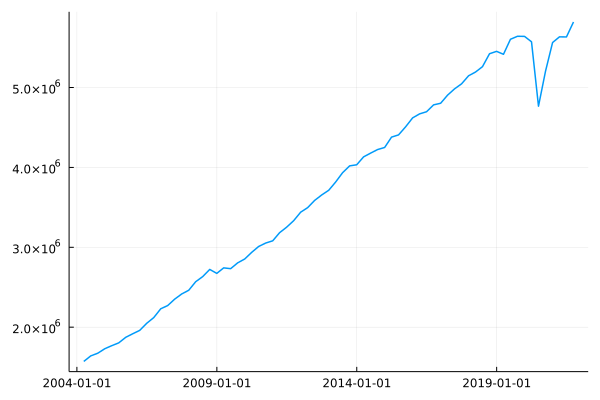

In [21]:
date_sa = sa_data[!, :date]
plot(date_sa, gdp_1, legend = false, lw = 1.5)

One of the most popular transformations of GDP data is to take a natural logarithm. The reason for this is that differences between adjacent values in the GDP series represent growth rates once the series is "logged". We will get back to this point at a later stage. If we take a natural log of the series then the plot of GDP looks as follows, 

In [121]:
log_gdp = log.(gdp_1); # remember the dot syntax, since we are broadcasting the log over all the values of GDP

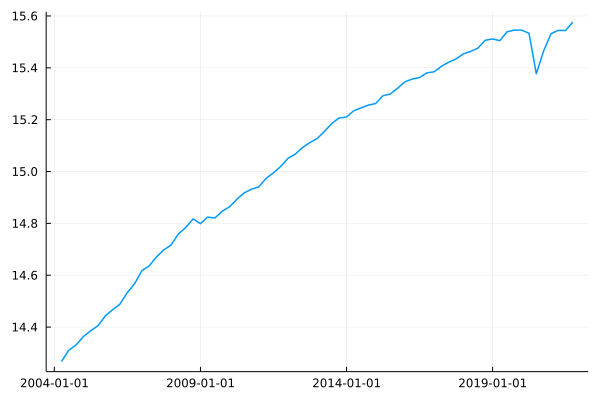

In [122]:
plot(date_sa, log_gdp, legend = false, lw = 1.5)

You will see that the scale on the y-axis has changed after this transformation. The slope of this graph indicates the growth rate. A point that we will touch on soon. 

We can also plot some of the other variables in our dataset, such as the inflation rate. 

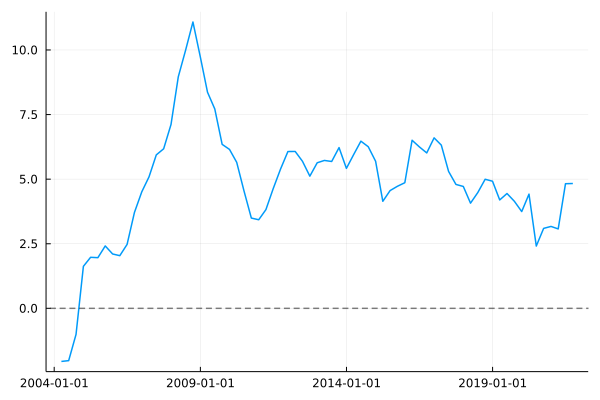

In [130]:
inflation_rate = sa_data.inflation
plot(date_sa, inflation_rate, legend = false, lw = 1.5)
plot!([0], legend = false, lw = 1.5, seriestype = :hline, color = :black, ls = :dash, alpha = 0.5)

# Descriptive statistics

Some of the most widely used statistics are the mean (average) and standard deviation. They can be easily computed with the computer as follows,  

In [24]:
inflation_1 = sa_data[!, :inflation] # select the inflation column
mean(inflation_1) # mean value of inflation

4.830130044713535

In [25]:
std(inflation_1) # standard deviation of inflation

2.3122543025163282

Let us plot a histogram for the data and also indicate where the mean is in this plot. 

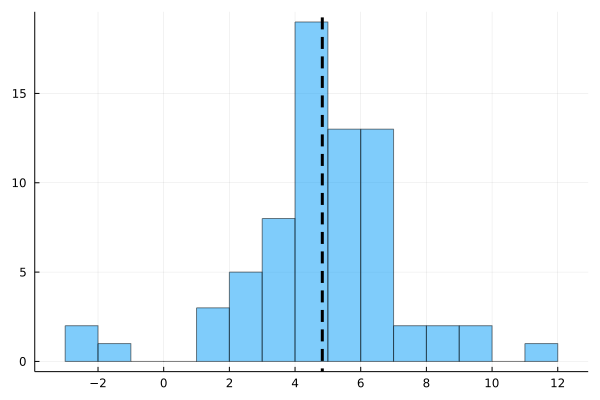

In [60]:
histogram(inflation_1, legend = false, alpha = 0.5, bins = 20) # a histogram gives a general idea of what the distribution of values for inflation looks like.
plot!([mean(inflation_1)],  seriestype = :vline, lw = 3, colour = :black, ls = :dash) # plots the mean value

# Math fundamentals

Mathematics is so much easier when we get to use a computer. In this section I will introduce some of the basic mathematical theory that you need as a macroeconomist and then we will show you how that relates to programming.

## Growth rates

Computing growth rates is quite important in macroeconomics. This is something that you will frequently encounter and it is important to know how to do this. The growth rate between subsequent two dates can be calculated as follows, 

$$
\left(\frac{Y_{t} - Y_{t-1}}{Y_{t-1}}\right) \times 100 = \left(\frac{Y_{t}}{Y_{t-1}} - 1\right) \times 100 
$$


If you are working with quarterly data and want to calculate the growth rate from one quarter to the same quarter next year then you should use, 

$$
\left(\frac{Y_{t}}{Y_{t-4}} - 1\right) \times 100 
$$

In addition, we can calculate the monthly or quarterly growth rate at an annual rate, 

$$
\left(\left[\frac{Y_{t}}{Y_{t-1}}\right]^{n} - 1\right) \times 100 
$$
where $n = 4$ represents quarterly growth and $n = 12$ gives monthly growth. 

Finally, we can calculate the average growth rate over $n$ years with the following formula, 

$$
\left(\left[\frac{Y_{t}}{Y_{t-n}}\right]^{1/n} - 1\right) \times 100 
$$

### Examples of growth rate calculations

Let us try calculating some growth rates with the data at hand. We will focus on GDP growth rates for this example, 

In [64]:
gdp_first = sa_data[1, :gdp]; # first value of the GDP series
gdp_second = sa_data[2, :gdp]; # second value of the GDP series

gdp_growth_1 = ((gdp_second - gdp_first)/gdp_first) * 100 # using the formula for growth between two periods. 

4.414220084246427

There is an alternative way to calculate an approximation to the growth rate from above. We can simply take the natural logarithm of the two values and subtract them from each other. In other words we have that, 

$$
\left(\frac{Y_{t}}{Y_{t-1}} - 1\right) \times 100 \approx \log(Y_{t}) - \log(Y_{t-1}) \times 100
$$


In [66]:
(log(gdp_second) - log(gdp_first)) * 100

4.319568788852912

The values are not exactly the same. This is simply an approximation which is often used in practice. 

As another example, let us calculate the quarterly growth rate of GDP and then plot the resulting values. This calculation is a bit more tricky since we are now going to apply it to the entire dataset. Let me explain the logic of what we are going to do here. 

First, we are going to create a new column that contains a lagged version of the original column for GDP. Why do we want to do this? The reason is that we want to be able to divide $Y_t$ by $Y_{t-4}$ from our formula above. However, we only have values for $Y_t$ in the $t$-th column and not $Y_{t-4}$. So for every row we need to create a corresponding lagged version of the original column. Before we do anything, let us take a look at the first few values of the dataset to see what we need to change. We only care about the first two columns, so we will only select those. 

In [73]:
first(sa_data[!, 1:2], 8)

,date,gdp
,Date,Int64
1,2004-03-31,1571580
2,2004-06-30,1640953
3,2004-09-30,1674699
4,2004-12-31,1731000
5,2005-03-31,1768828
6,2005-06-30,1803783
7,2005-09-30,1873743
8,2005-12-31,1918423


In [93]:
sa_data.lagged_gdp = lag(sa_data[!, 2], 4);

We can see that the lagged GDP column has successfully been created and added to the DataFrame. 

In [94]:
first(sa_data[!, :], 8) 

,date,gdp,repo,cpi,inflation,lagged_gdp
,Date,Int64,Float64,Float64,Float64,Int64?
1,2004-03-31,1571580,8.0,51.1689,-2.05565,missing
2,2004-06-30,1640953,8.0,51.4474,-2.02507,missing
3,2004-09-30,1674699,7.66667,51.5677,-1.00851,missing
4,2004-12-31,1731000,7.5,51.8483,1.62524,missing
5,2005-03-31,1768828,7.5,52.1796,1.97509,1571580
6,2005-06-30,1803783,7.0,52.456,1.9603,1640953
7,2005-09-30,1873743,7.0,52.8125,2.41398,1674699
8,2005-12-31,1918423,7.0,52.9391,2.10385,1731000


Now we can calculate the growth rate, 

In [116]:
gdp_growth_quarterly = (log.(sa_data.gdp) .- log.(sa_data.lagged_gdp)) .* 100; # log method
gdp_growth_quarterly_1 = ((sa_data.gdp ./ sa_data.lagged_gdp) .- 1) .* 100; # formula method

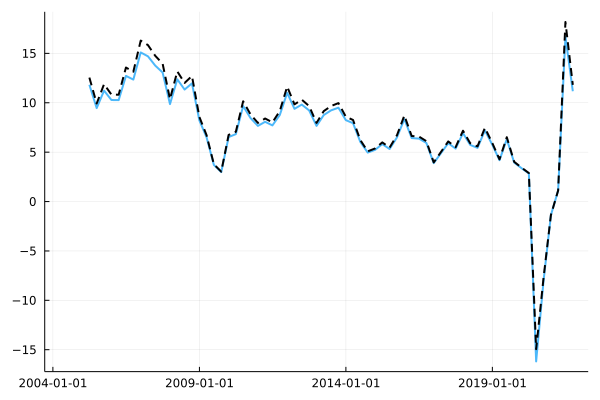

In [117]:
plot(date_sa, gdp_growth_quarterly, legend = false, lw = 2, alpha = 0.7) # log method
plot!(date_sa, gdp_growth_quarterly_1, legend = false, lw = 2, ls = :dash, color = :black) # formula method

For the other formulas you can perform similar calculations. As an exercise you can attempt to use the other formulas to calculate annualised growth rates. 